### Name: Abhinav Deepak Mali
### Roll Number: 0084
### Batch: T3
### Class: TE Computer
### Subject: Data Science and Big Data Analytics
### Practical Number: 4

### Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:/Users/user/OneDrive/Documents/DSBDA/HousingData.csv")

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
data.shape

(506, 14)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
data = data.replace("NA",np.nan)

In [12]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
data["CRIM"].mode()

0     0.01501
1    14.33370
Name: CRIM, dtype: float64

In [47]:
data["CRIM"].value_counts()

CRIM
0.01501    20
0.01501     2
14.3337     2
0.04544     1
0.02498     1
           ..
1.34284     1
1.22358     1
2.44668     1
3.53501     1
0.04741     1
Name: count, Length: 485, dtype: int64

In [14]:
data["CRIM"] = data["CRIM"].replace(np.nan,"0.01501")

In [15]:
data.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [16]:
data["ZN"].mode()

0    0.0
Name: ZN, dtype: float64

In [17]:
data["ZN"] = data["ZN"].replace(np.nan,"0.0")

In [20]:
data["INDUS"] = data["INDUS"].replace(np.nan,data["INDUS"].mean())

In [21]:
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [22]:
data["CHAS"] = data["CHAS"].replace(np.nan,data["CHAS"].mean())

In [23]:
data["AGE"] = data["AGE"].replace(np.nan,data["AGE"].mean())

In [46]:
data["LSTAT"].value_counts()

LSTAT
14.10    20
7.79      3
6.36      3
8.05      3
14.1      3
         ..
3.32      1
1.92      1
1.73      1
6.43      1
7.88      1
Name: count, Length: 439, dtype: int64

In [24]:
data["LSTAT"].mode()

0     6.36
1     7.79
2     8.05
3    14.10
4    18.13
Name: LSTAT, dtype: float64

In [25]:
data["LSTAT"] = data["LSTAT"].replace(np.nan,"14.10")

In [26]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

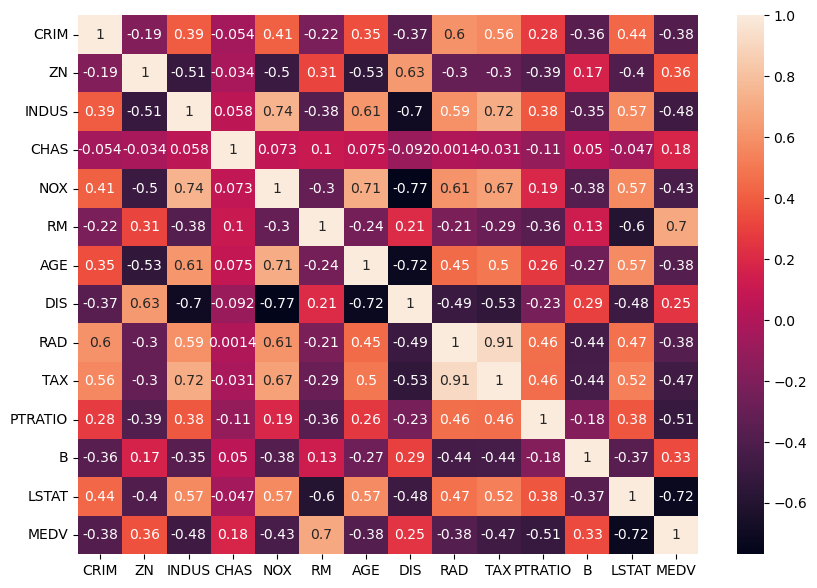

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [29]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [30]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = data[['MEDV']]

## With test_size = 0.25 and random_state = 10

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred

array([[30.64060258],
       [32.17987697],
       [30.55621231],
       [18.87661711],
       [18.4014617 ],
       [16.07007796],
       [35.43827038],
       [14.39647989],
       [24.90414543],
       [31.70796917],
       [21.47087164],
       [30.88916969],
       [28.22517018],
       [33.67645979],
       [28.66442368],
       [40.86673527],
       [24.81794698],
       [23.36311507],
       [25.92983651],
       [21.16642658],
       [32.06340362],
       [17.50472592],
       [25.34330899],
       [25.29880601],
       [32.78293505],
       [20.78692234],
       [19.70104051],
       [17.14510346],
       [38.54610847],
       [ 0.79313848],
       [32.52015379],
       [32.1225129 ],
       [25.76311404],
       [24.67570414],
       [20.21134157],
       [19.7701958 ],
       [ 4.408583  ],
       [34.64080424],
       [26.97058869],
       [27.83781665],
       [30.06306897],
       [29.66865801],
       [18.11938022],
       [31.57774122],
       [18.0733735 ],
       [28

In [35]:
# The mean squared error
print("Mean squared error: ",mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: ",r2_score(y_test,y_pred))

Mean squared error:  34.29047306169492
Coefficient of determination:  0.6560212640789719


## With test_size = 0.60 and random_state = 10

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.60,random_state=10)

In [41]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
# The mean squared error
print("Mean squared error: ",mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: ",r2_score(y_test,y_pred))

Mean squared error:  25.671501134033363
Coefficient of determination:  0.7190529332710947
